In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../../datamarts/final_dataframe.tsv', sep='\t')

In [3]:
df.head()

,Timestamp,NUMERO,CCAA,CAPROV,TAMAMU,DENSIDAD,SUPERF,AGUACALI,CALEF,ZONARES,...,EDUCACIÓN_NO_FORMAL_104,RESTAURACIÓN_111,ALOJAMIENTO_112,CUIDADOS_PERSONALES_121,EFECTOS_PERSONALES_123,PROTECCIÓN_SOCIAL_124,SEGUROS_125,SERVICIOS_FINANCIEROS_126,OTROS_SERVICIOS_127,REMESAS_128
0,2016-01-01T00:00:00,1,7,0,1,1,96,1,1,3,...,NaN,668.274699,NaN,98.935487,0.300641,NaN,32.562055,NaN,1.535195,NaN
1,2016-01-01T00:00:00,47,7,0,1,1,100,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,27.276033,NaN,NaN,NaN
2,2016-01-01T00:00:00,53,7,1,4,3,80,1,1,5,...,NaN,111.840309,NaN,NaN,NaN,NaN,47.234176,NaN,NaN,NaN
3,2016-01-01T00:00:00,67,7,1,4,2,85,1,1,5,...,NaN,4.016997,NaN,NaN,3.614237,NaN,NaN,NaN,NaN,NaN
4,2016-01-01T00:00:00,68,7,0,1,1,90,1,1,5,...,NaN,319.334544,159.860498,73.549838,NaN,NaN,33.530006,NaN,66.724382,NaN


In [4]:
output_columns = [col for col in df.columns if col.endswith(tuple(f"_{i}" for i in range(11, 129)))]


## Analísis de sensibilidad no lineal por código

### 🗂 Categorías por código (Super_Categoría)

| Código | Categoría                                                                                           |
|--------|-----------------------------------------------------------------------------------------------------|
| 01.1   | PRODUCTOS ALIMENTICIOS                                                                              |
| 01.2   | BEBIDAS NO ALCOHÓLICAS                                                                              |
| 02.1   | BEBIDAS ALCOHÓLICAS                                                                                 |
| 02.2   | TABACO                                                                                              |
| 03.1   | ARTÍCULOS DE VESTIR                                                                                 |
| 03.2   | CALZADO                                                                                             |
| 04.1   | ALQUILERES REALES DE LA VIVIENDA                                                                    |
| 04.2   | ALQUILERES IMPUTADOS DE LA VIVIENDA                                                                 |
| 04.3   | GASTOS CORRIENTES DE MANTENIMIENTO Y REPARACIÓN DE LA VIVIENDA                                     |
| 04.4   | SUMINISTRO DE AGUA Y OTROS SERVICIOS RELACIONADOS CON LA VIVIENDA                                  |
| 04.5   | ELECTRICIDAD, GAS Y OTROS COMBUSTIBLES                                                              |
| 05.1   | MUEBLES, ARTÍCULOS DE AMUEBLAMIENTO, ALFOMBRAS Y OTROS REVESTIMIENTOS PARA SUELOS                  |
| 05.2   | ARTÍCULOS TEXTILES PARA EL HOGAR                                                                    |
| 05.3   | APARATOS DE CALEFACCIÓN Y DE COCINA, FRIGORÍFICOS, LAVADORAS Y OTROS GRANDES ELECTRODOMÉSTICOS     |
| 05.4   | CRISTALERÍA, VAJILLA, CUBERTERÍA Y OTROS UTENSILIOS DEL HOGAR                                       |
| 05.5   | HERRAMIENTAS PARA CASA Y JARDÍN                                                                     |
| 05.6   | BIENES Y SERVICIOS PARA EL MANTENIMIENTO CORRIENTE DEL HOGAR                                       |
| 06.1   | PRODUCTOS FARMACÉUTICOS; APARATOS Y MATERIAL TERAPÉUTICO                                            |
| 06.2   | SERVICIOS MÉDICOS Y PARAMÉDICOS AMBULATORIOS                                                        |
| 06.3   | SERVICIOS HOSPITALARIOS                                                                             |
| 07.1   | COMPRA DE VEHÍCULOS                                                                                 |
| 07.2   | UTILIZACIÓN DE VEHÍCULOS PERSONALES                                                                 |
| 07.3   | SERVICIOS DE TRANSPORTE                                                                             |
| 08.1   | SERVICIOS POSTALES                                                                                  |
| 08.2   | EQUIPOS DE TELÉFONO Y FAX                                                                           |
| 08.3   | SERVICIOS DE TELÉFONO Y FAX                                                                         |
| 09.1   | EQUIPOS Y ACCESORIOS AUDIOVISUALES, FOTOGRÁFICOS Y DE PROCESAMIENTO DE INFORMACIÓN                 |
| 09.2   | OTROS BIENES DURADEROS PARA EL OCIO Y LA CULTURA                                                   |
| 09.3   | OTROS ARTÍCULOS Y EQUIPOS PARA EL OCIO, JARDINERÍA Y MASCOTAS                                      |
| 09.4   | SERVICIOS RECREATIVOS Y CULTURALES                                                                  |
| 09.5   | PRENSA, LIBRERÍA Y PAPELERÍA                                                                        |
| 09.6   | PAQUETES TURÍSTICOS                                                                                 |
| 10.1   | EDUCACIÓN INFANTIL Y PRIMARIA (NIVELES 0 Y 1 CNED-P-2014)                                           |
| 10.2   | EDUCACIÓN SECUNDARIA Y EDUCACIÓN POSTSECUNDARIA NO SUPERIOR (NIVELES 2, 3 Y 4 CNED-P-2014)         |
| 10.3   | EDUCACIÓN SUPERIOR (NIVELES 5, 6, 7 y 8 CNED-P-2014)                                                |
| 10.4   | EDUCACIÓN NO FORMAL (NIVEL 9 CNED-P-2014)                                                           |
| 11.1   | RESTAURACIÓN                                                                                        |
| 11.2   | SERVICIOS DE ALOJAMIENTO                                                                            |
| 12.1   | CUIDADOS PERSONALES                                                                                 |
| 12.3   | EFECTOS PERSONALES NO DECLARADOS ANTERIORMENTE                                                     |
| 12.4   | PROTECCIÓN SOCIAL                                                                                   |
| 12.5   | SERVICIOS DE SEGUROS                                                                                |
| 12.6   | SERVICIOS FINANCIEROS NO DECLARADOS EN OTRA PARTE                                                  |
| 12.7   | OTROS SERVICIOS NO DECLARADOS ANTERIORMENTE                                                        |
| 12.8   | REMESAS                                                                                             |


---


## MLP

In [5]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [6]:
def train_mlp_per_category(df, output_columns, hidden_layer_sizes=(128, 64, 32), max_iter=500, top_n=10):
    r2_results = []
    all_importances = []

    excluded = output_columns + ["GASTOT_MENSUAL", "NUMERO", "CCAA", "CAPROV", "Inflacion"]
    input_features = [col for col in df.select_dtypes(include="number").columns if col not in excluded]

    for target in output_columns:
        print(f"\n🔧 Training MLP for {target}...")

        df_clean = df.dropna(subset=[target] + input_features)
        if df_clean.shape[0] < len(input_features) + 10:
            print("❌ Not enough data. Skipping.")
            continue

        X = df_clean[input_features]
        y = df_clean[target]

        # Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Normalize
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # MLP model
        mlp = MLPRegressor(
            hidden_layer_sizes=hidden_layer_sizes,
            activation='relu',
            solver='adam',
            early_stopping=True,
            n_iter_no_change=10,
            validation_fraction=0.1,
            max_iter=max_iter,
            random_state=42
        )
        mlp.fit(X_train, y_train)

        # Evaluate
        y_pred = mlp.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        print(f"✅ R² for {target}: {r2:.4f}")

        # Permutation importance
        print("🔍 Calculating permutation importances...")
        result = permutation_importance(mlp, X_test, y_test, n_repeats=5, random_state=42, n_jobs=-1)
        importances_df = pd.DataFrame({
            "Variable": df_clean[input_features].columns,
            "Importance": result.importances_mean,
            "Target": target
        }).sort_values(by="Importance", ascending=False)

        # Show top variables
        print(f"📊 Top {top_n} variables by importance for {target}:")
        print(importances_df.head(top_n).to_string(index=False))

        # Save results
        r2_results.append({"Target": target, "R2": r2})
        all_importances.append(importances_df)

    r2_df = pd.DataFrame(r2_results).sort_values(by="R2", ascending=False)
    importances_df = pd.concat(all_importances, ignore_index=True)

    return r2_df, importances_df


In [7]:
mlp_r2_df, mlp_importances_df = train_mlp_per_category(df, output_columns)



🔧 Training MLP for PRODUCTOS_ALIMENTICIOS_11...
✅ R² for PRODUCTOS_ALIMENTICIOS_11: 0.2683
🔍 Calculating permutation importances...
📊 Top 10 variables by importance for PRODUCTOS_ALIMENTICIOS_11:
    Variable  Importance                    Target
     IMPEXAC    0.095733 PRODUCTOS_ALIMENTICIOS_11
   NADUL_MAS    0.078086 PRODUCTOS_ALIMENTICIOS_11
   NADUL_FEM    0.066099 PRODUCTOS_ALIMENTICIOS_11
Tipo_Interes    0.045346 PRODUCTOS_ALIMENTICIOS_11
   NNINO_MAS    0.039116 PRODUCTOS_ALIMENTICIOS_11
      EDADSP    0.028806 PRODUCTOS_ALIMENTICIOS_11
   Tasa_Paro    0.025097 PRODUCTOS_ALIMENTICIOS_11
   NNINO_FEM    0.024786 PRODUCTOS_ALIMENTICIOS_11
      CAJENA    0.016427 PRODUCTOS_ALIMENTICIOS_11
      CAPROP    0.009356 PRODUCTOS_ALIMENTICIOS_11

🔧 Training MLP for BEBIDAS_NO_ALCOHÓLICAS_12...
✅ R² for BEBIDAS_NO_ALCOHÓLICAS_12: 0.0801
🔍 Calculating permutation importances...
📊 Top 10 variables by importance for BEBIDAS_NO_ALCOHÓLICAS_12:
    Variable  Importance                    T

In [13]:
mlp_importances_df.head(50)

,Variable,Importance,Target
0,IMPEXAC,0.095733,PRODUCTOS_ALIMENTICIOS_11
1,NADUL_MAS,0.078086,PRODUCTOS_ALIMENTICIOS_11
2,NADUL_FEM,0.066099,PRODUCTOS_ALIMENTICIOS_11
3,Tipo_Interes,0.045346,PRODUCTOS_ALIMENTICIOS_11
4,NNINO_MAS,0.039116,PRODUCTOS_ALIMENTICIOS_11
5,EDADSP,0.028806,PRODUCTOS_ALIMENTICIOS_11
6,Tasa_Paro,0.025097,PRODUCTOS_ALIMENTICIOS_11
7,NNINO_FEM,0.024786,PRODUCTOS_ALIMENTICIOS_11
8,CAJENA,0.016427,PRODUCTOS_ALIMENTICIOS_11
9,CAPROP,0.009356,PRODUCTOS_ALIMENTICIOS_11


### Analísis del r2 de nuestros modelos

In [24]:
mlp_r2_df

,Target,R2
7,ALQUILERES_IMPUTADOS_DE_LA_VIVIENDA_42,0.803677
6,ALQUILERES_REALES_DE_LA_VIVIENDA_41,0.701878
9,SUMINISTRO_DE_AGUA_44,0.399583
10,ELECTRICIDAD_GAS_OTROS_COMBUSTIBLES_45,0.311771
32,EDUCACIÓN_INFANTIL_PRIMARIA_101,0.311707
44,REMESAS_128,0.283785
41,SEGUROS_125,0.274972
0,PRODUCTOS_ALIMENTICIOS_11,0.268349
25,SERVICIOS_TELÉFONO_FAX_83,0.261110
33,EDUCACIÓN_SECUNDARIA_POSTSECUNDARIA_102,0.213492


### Importancia de las variables por categoría de gasto

In [22]:
import matplotlib.pyplot as plt

def plot_feature_importances_by_target(df, top_n=15):
    """
    Genera una gráfica de barras horizontales por cada target en el DataFrame,
    mostrando las top_n variables más importantes.

    Parámetros:
    - df: DataFrame con columnas ['feature', 'importance', 'target']
    - top_n: número de variables más importantes a mostrar (por defecto 15)
    """
    targets = df['Target'].unique()
    for target in targets:
        subset = df[df['Target'] == target].sort_values(by='Importance', ascending=False).head(top_n)
        
        plt.figure(figsize=(10, 6))
        plt.barh(subset['Variable'], subset['Importance'])
        plt.xlabel('Importancia')
        plt.title(f'Importancia de variables para: {target}')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()


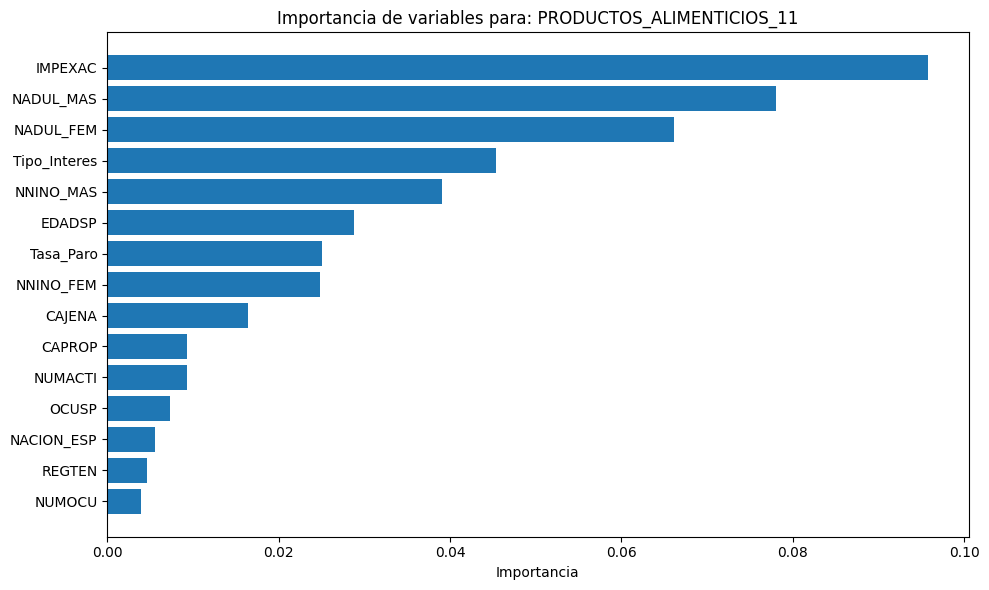

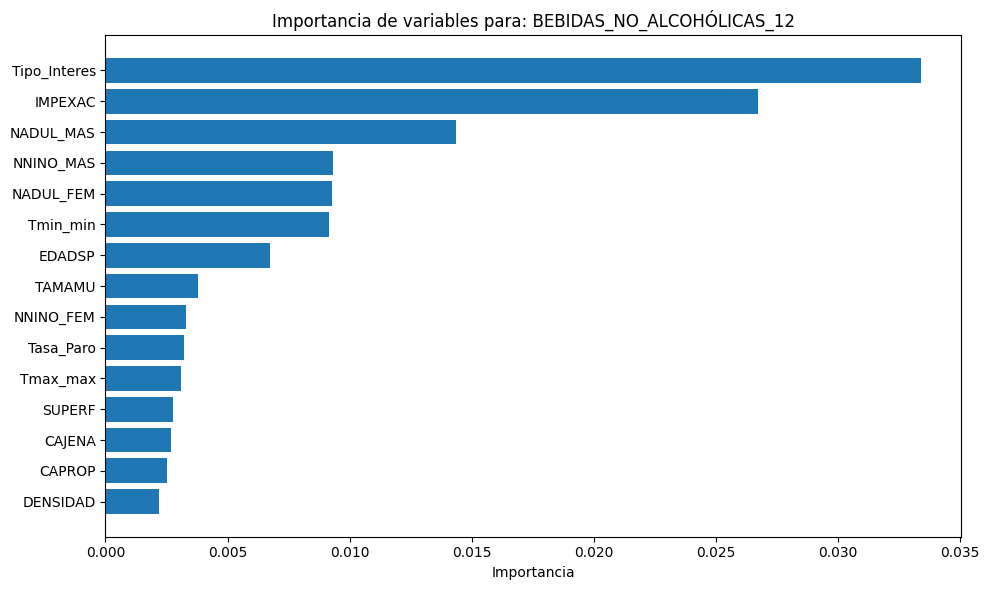

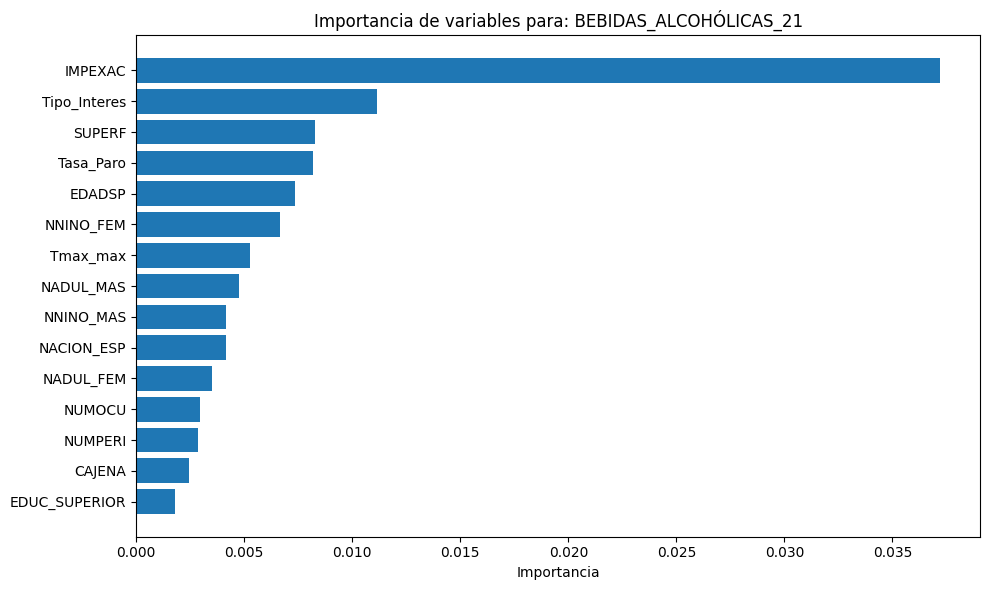

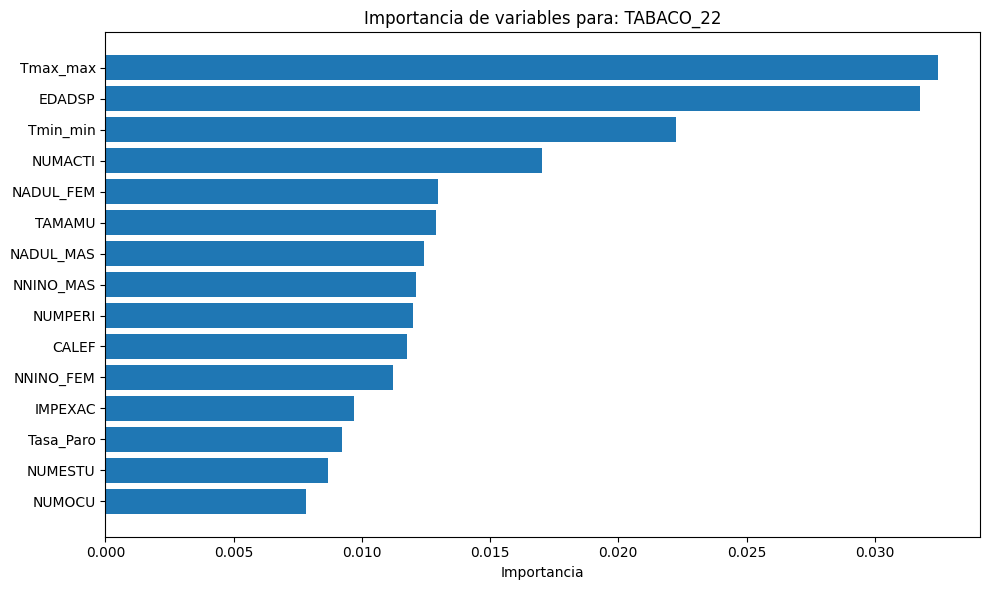

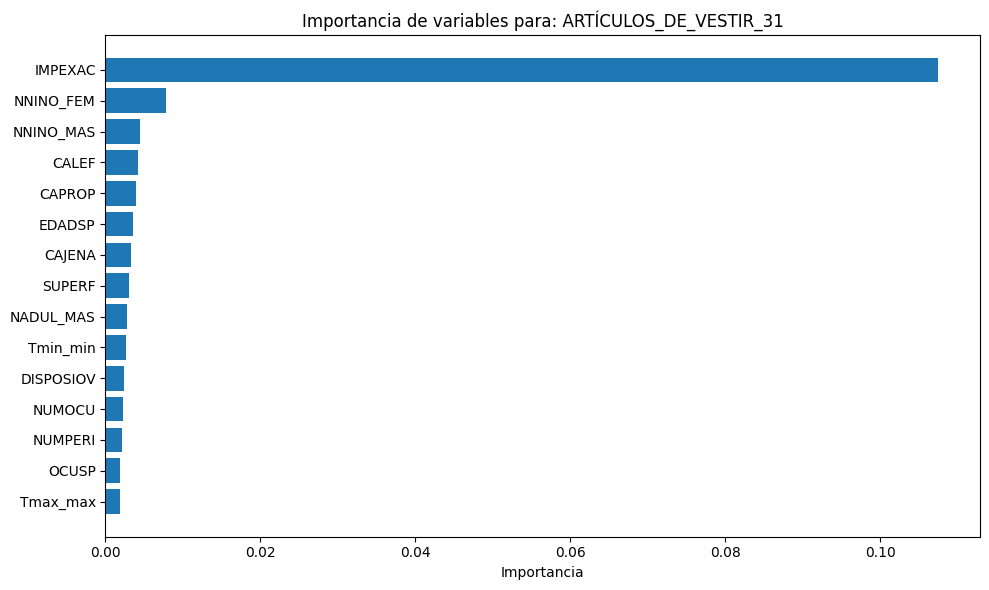

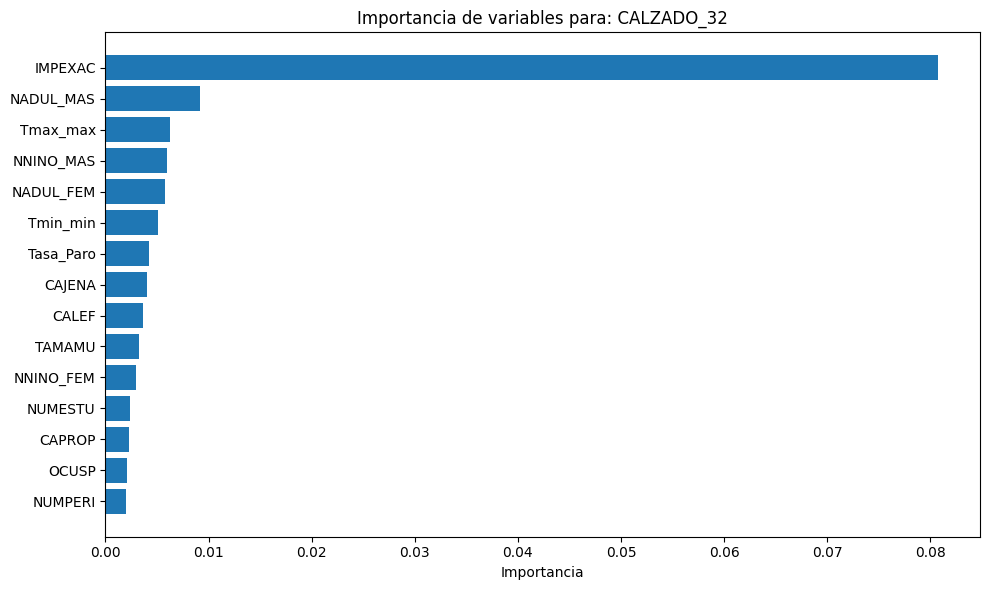

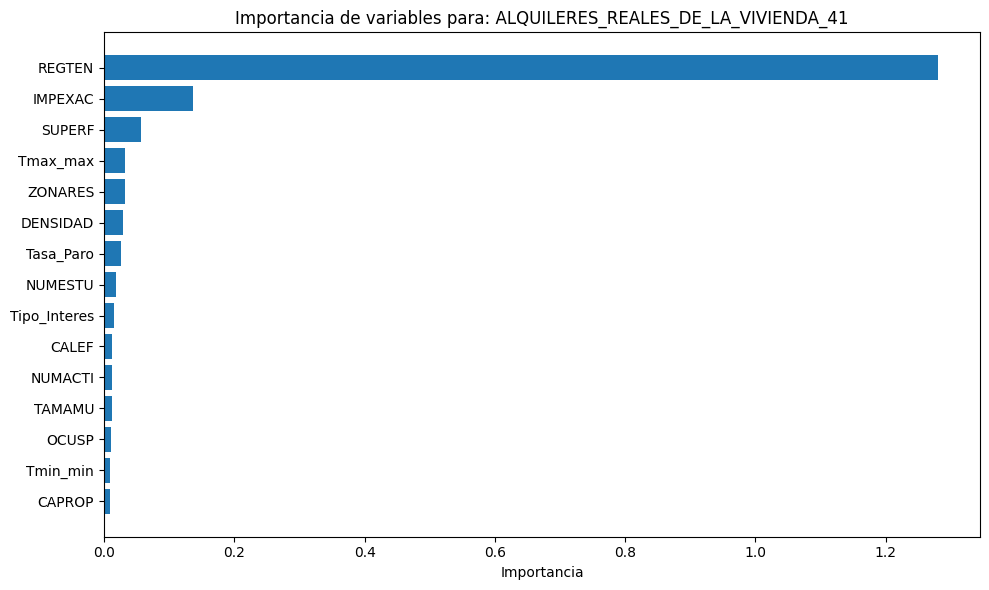

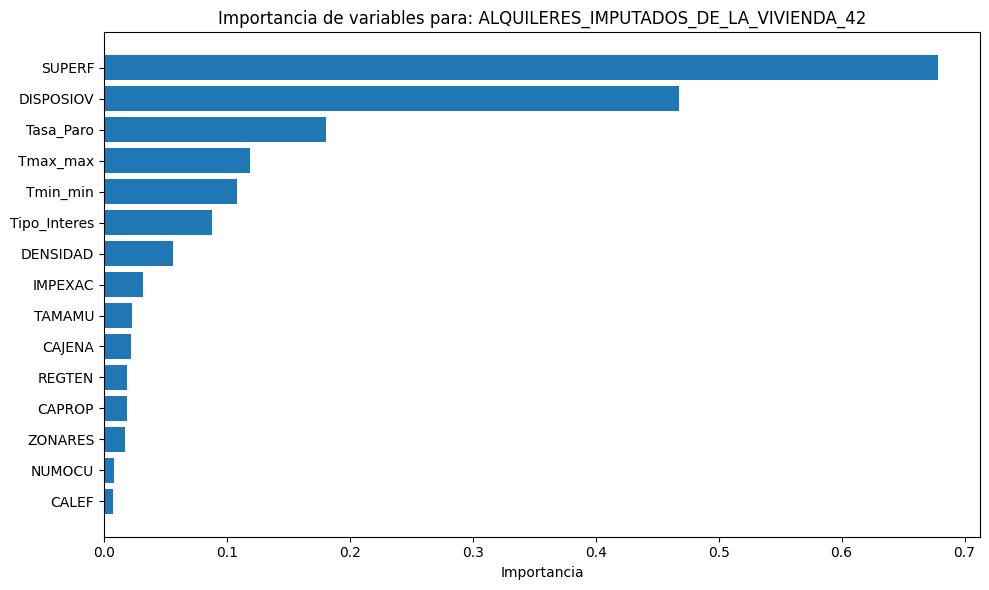

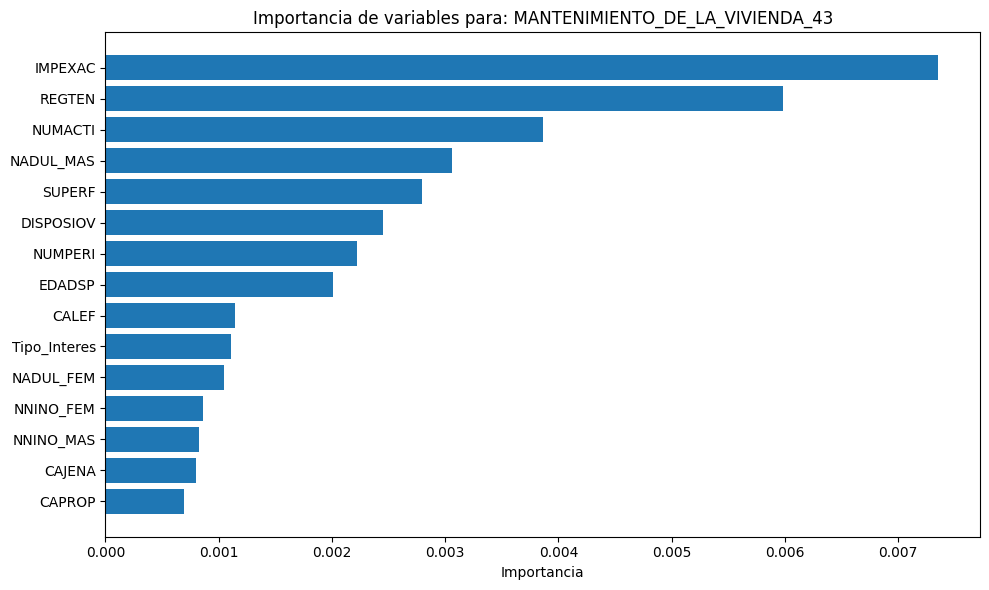

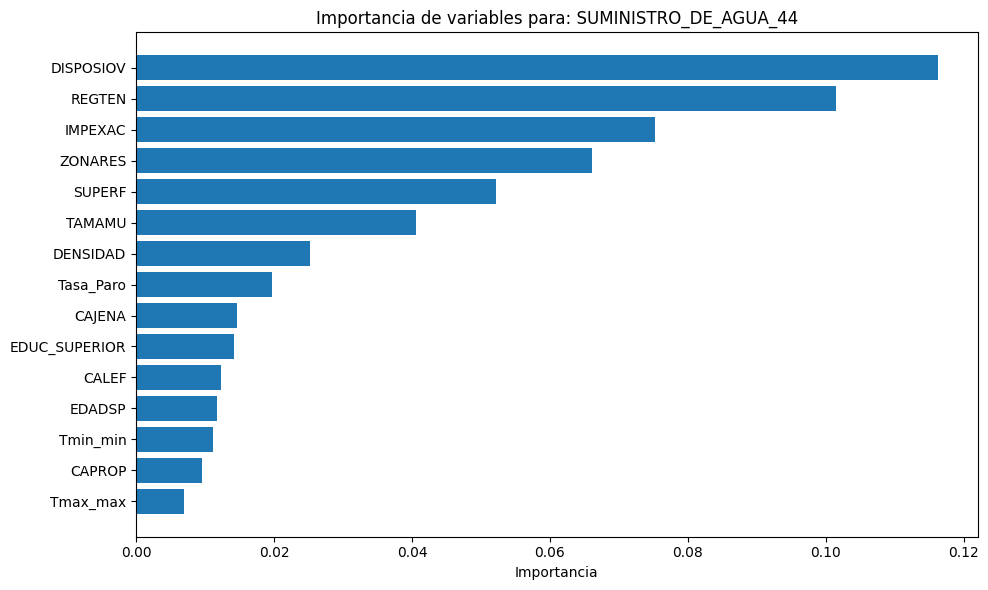

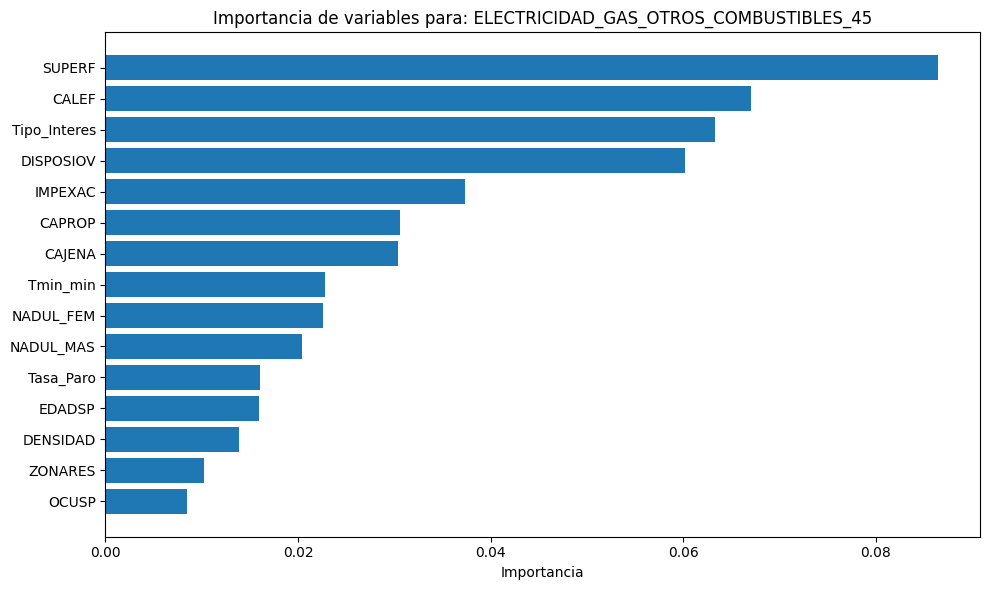

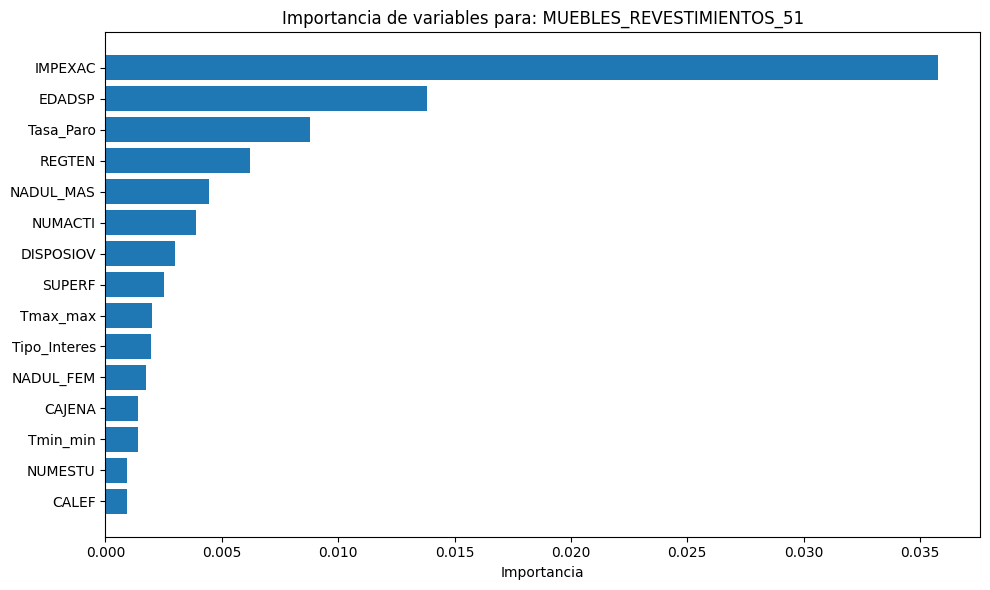

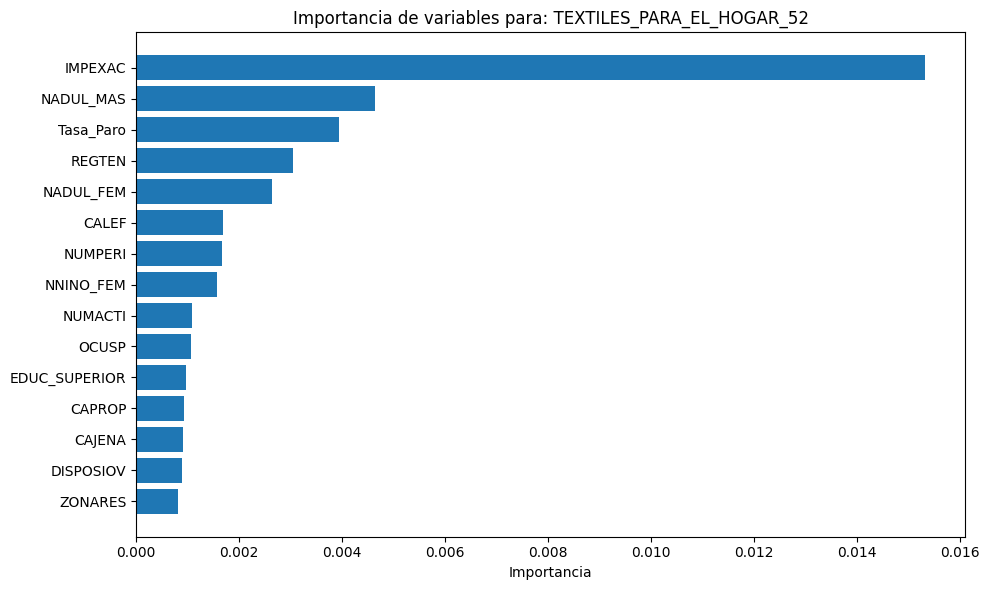

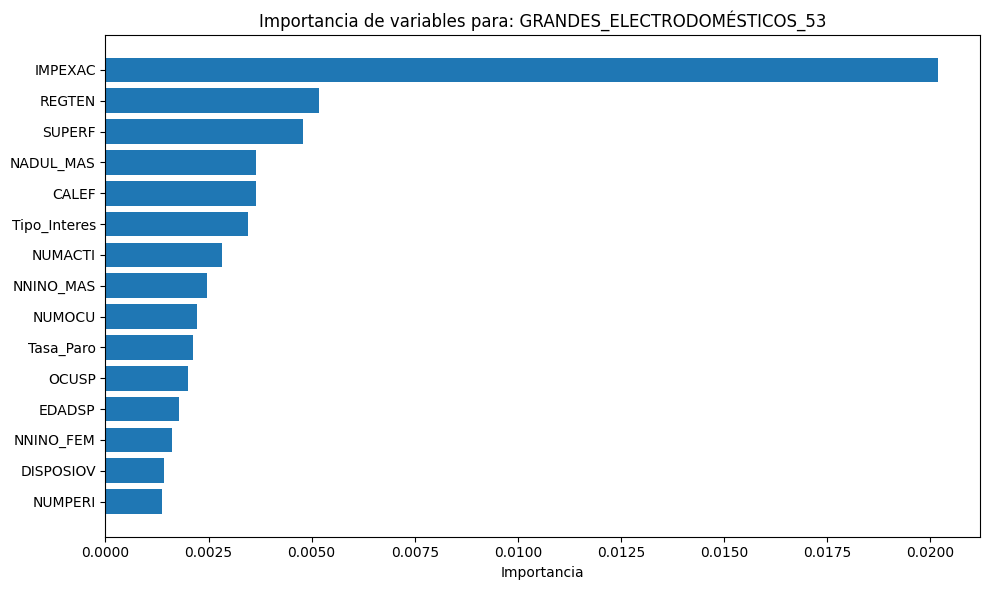

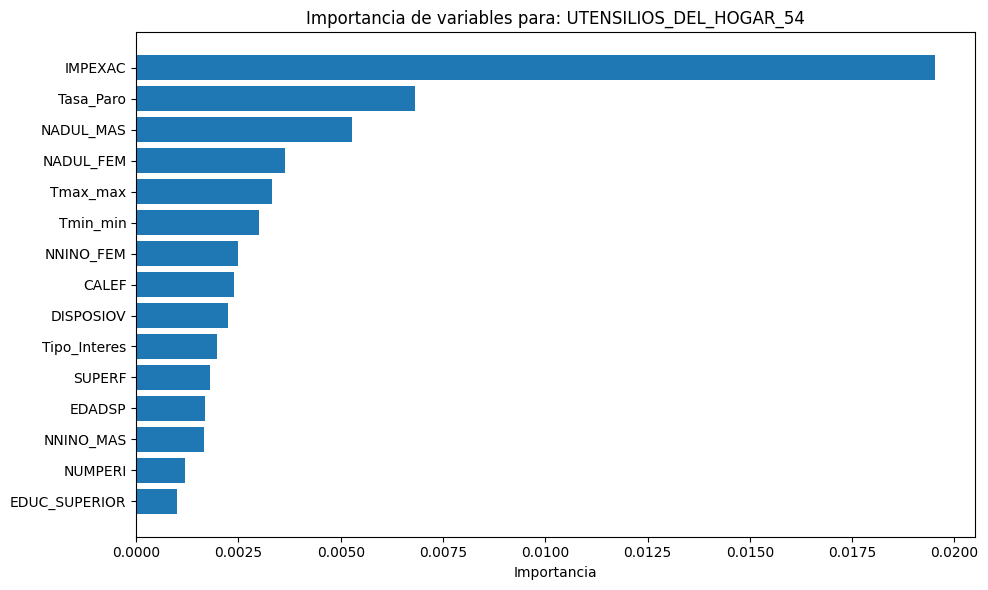

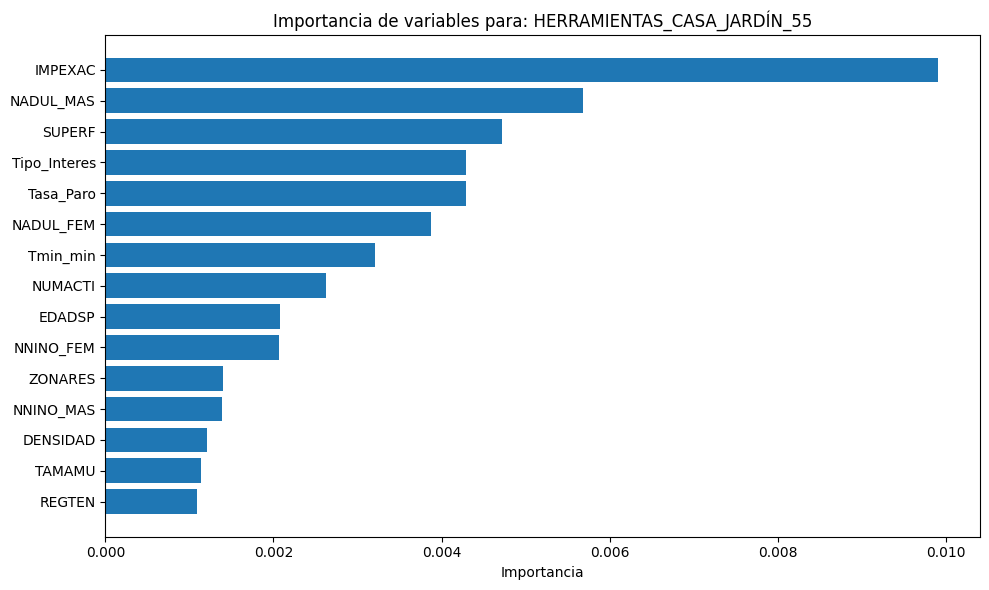

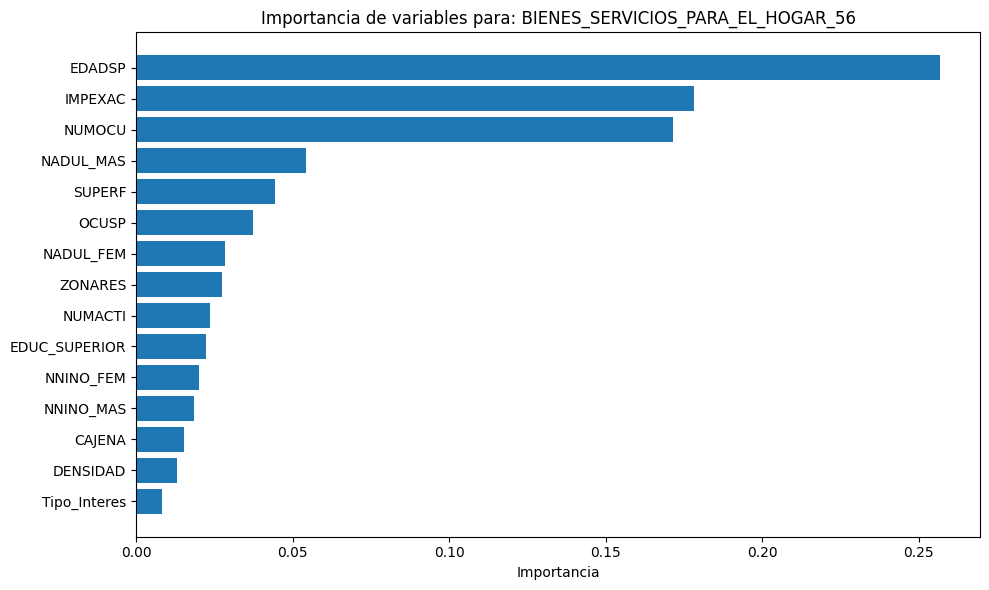

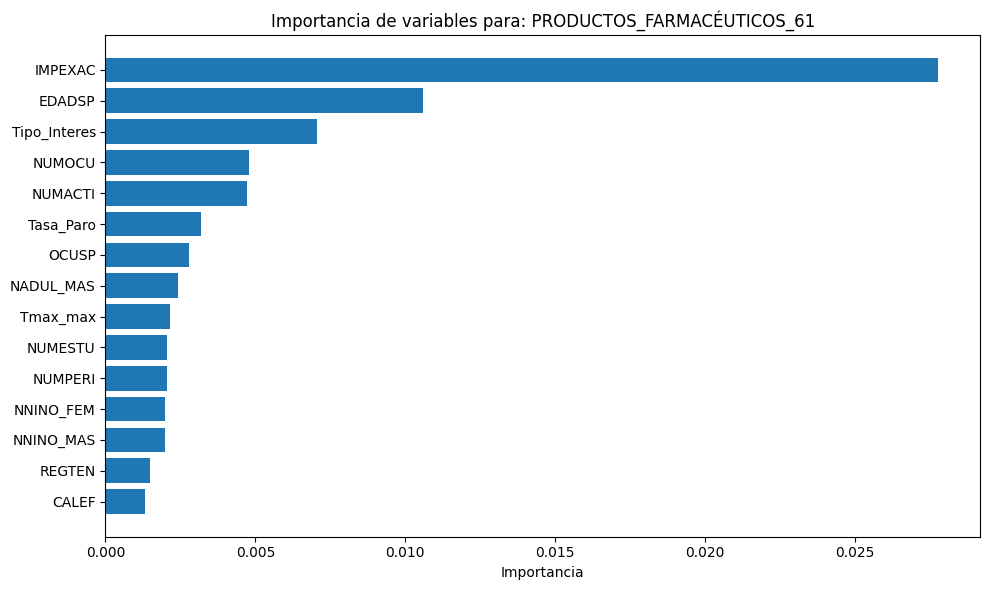

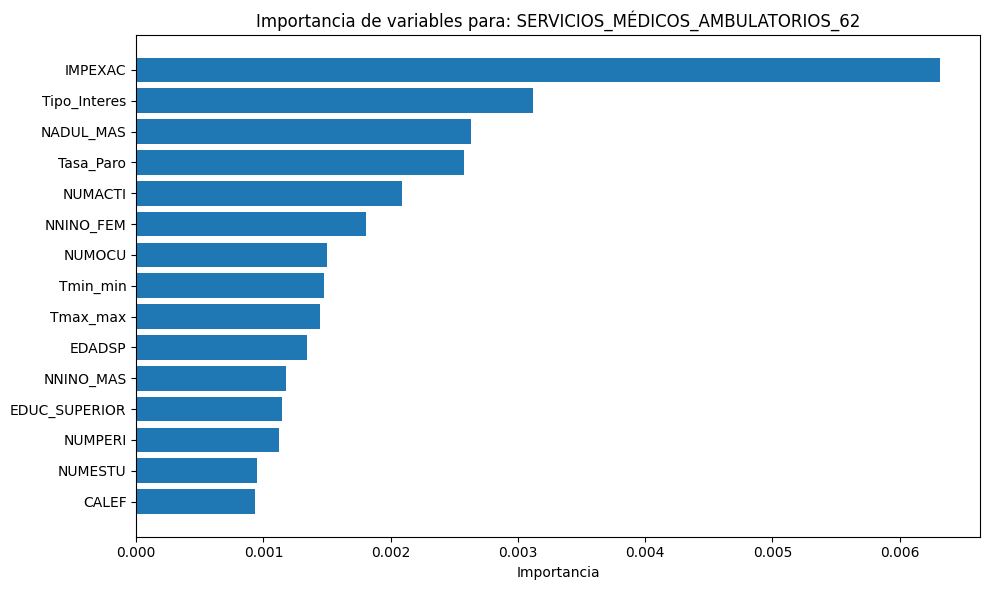

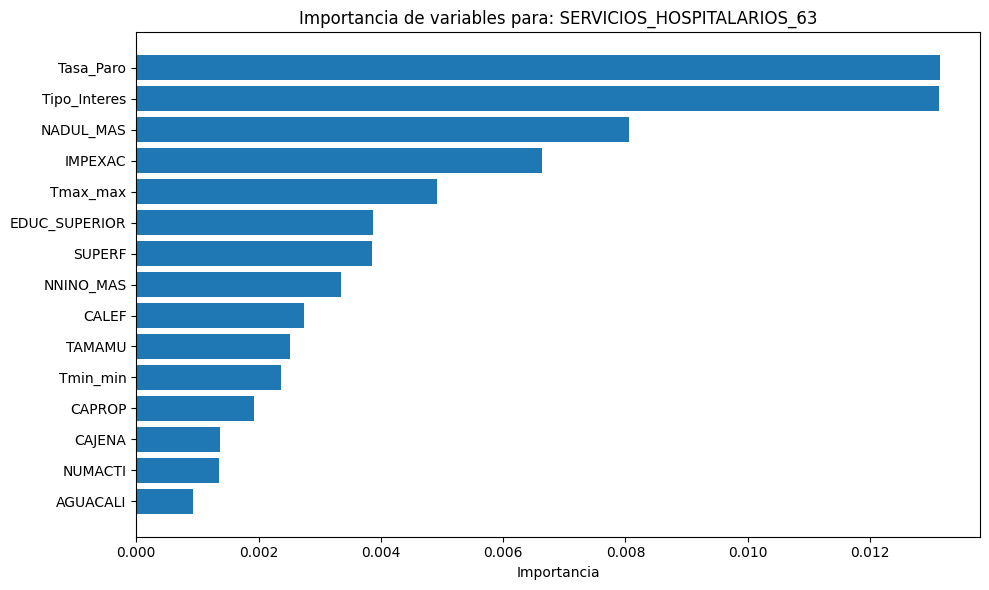

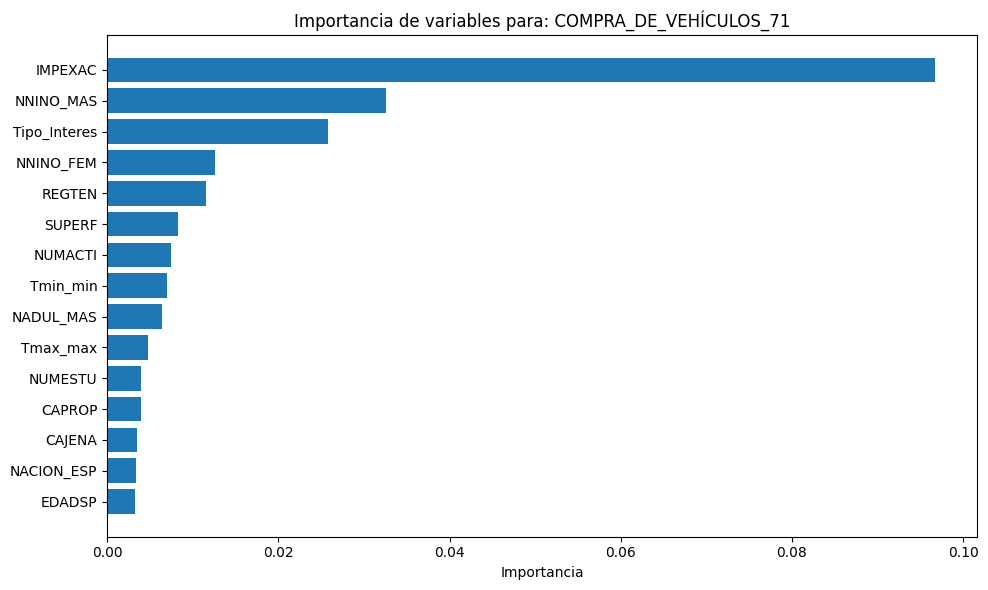

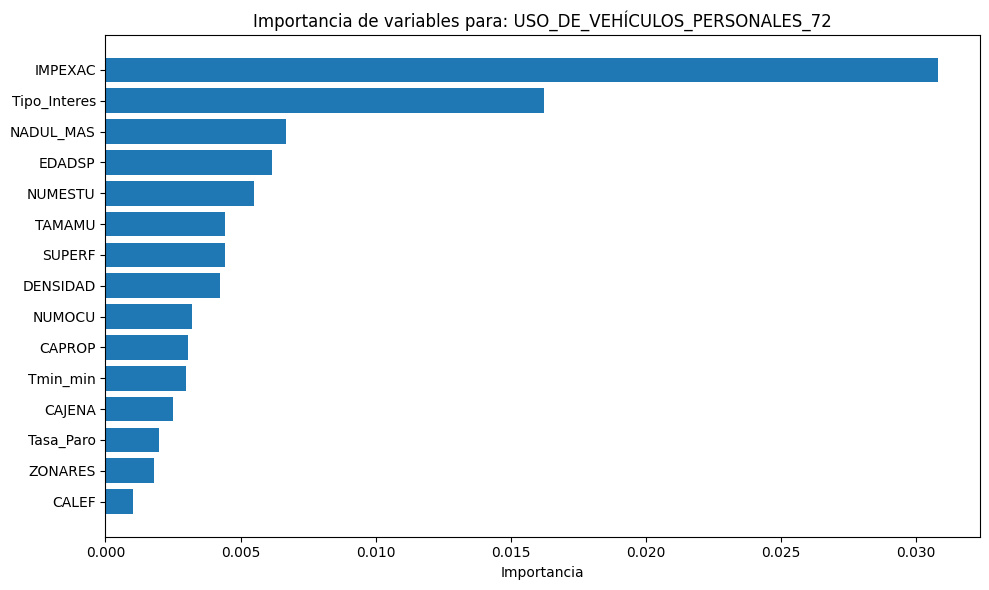

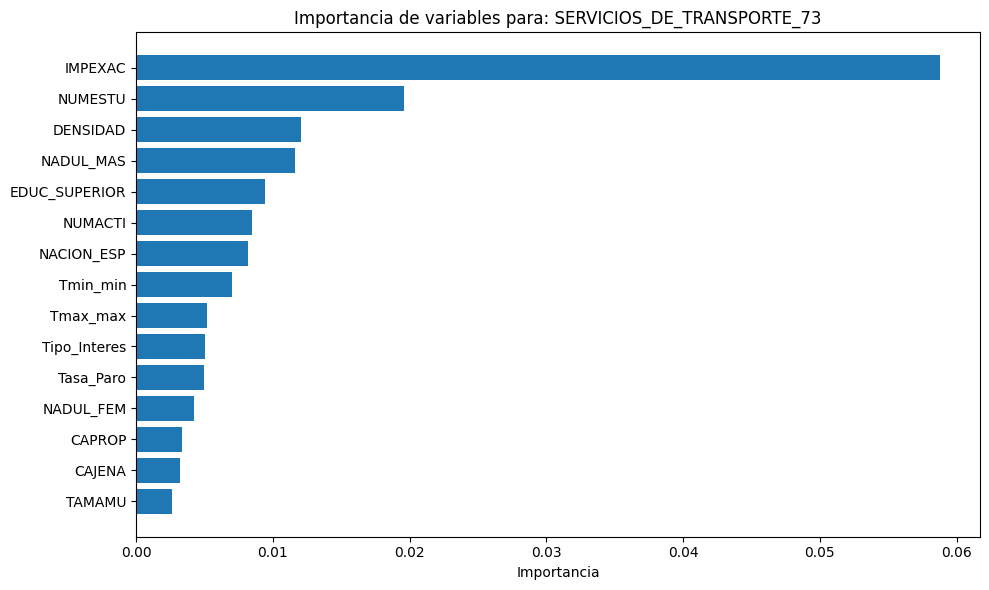

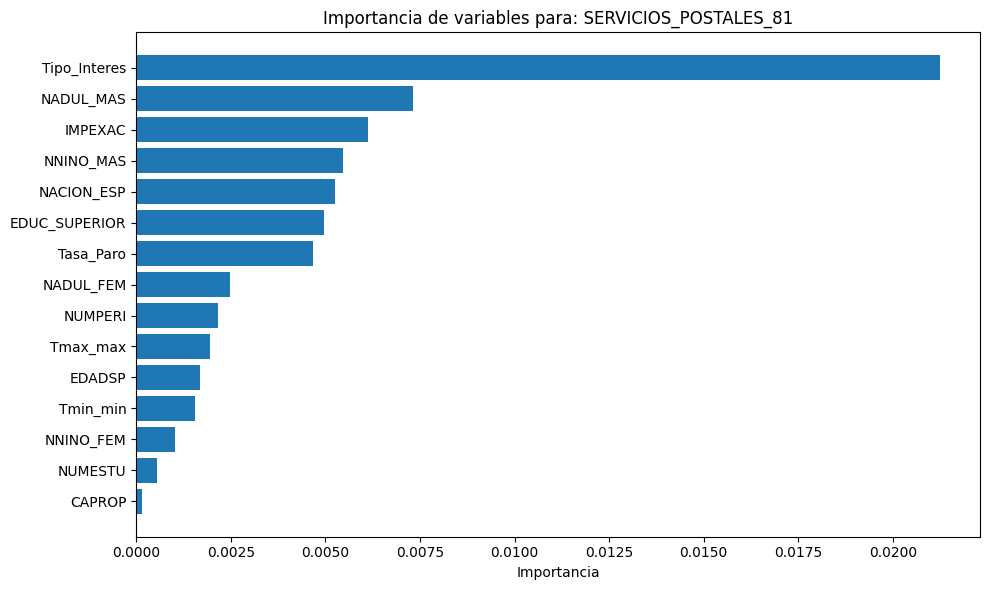

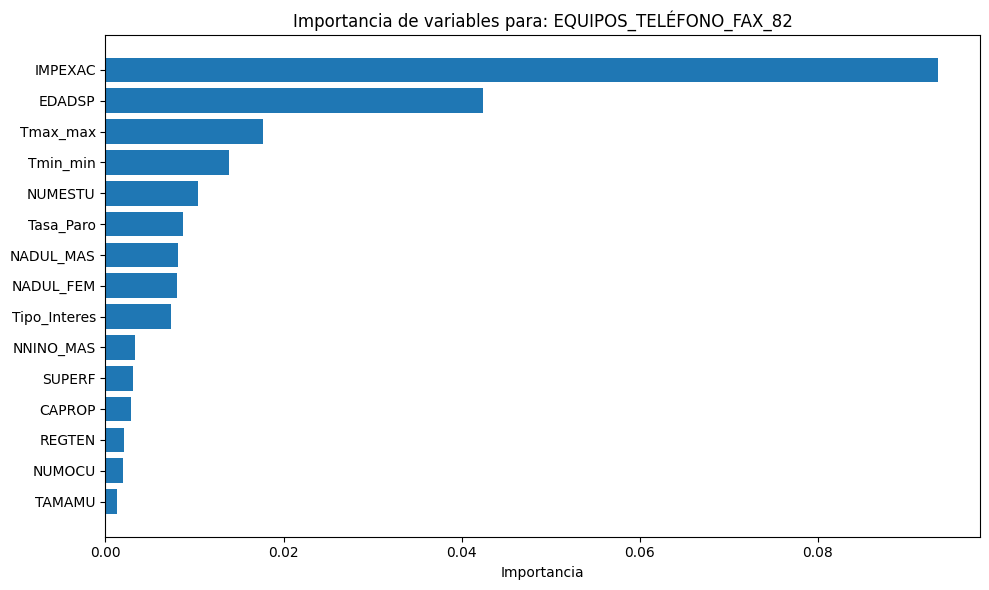

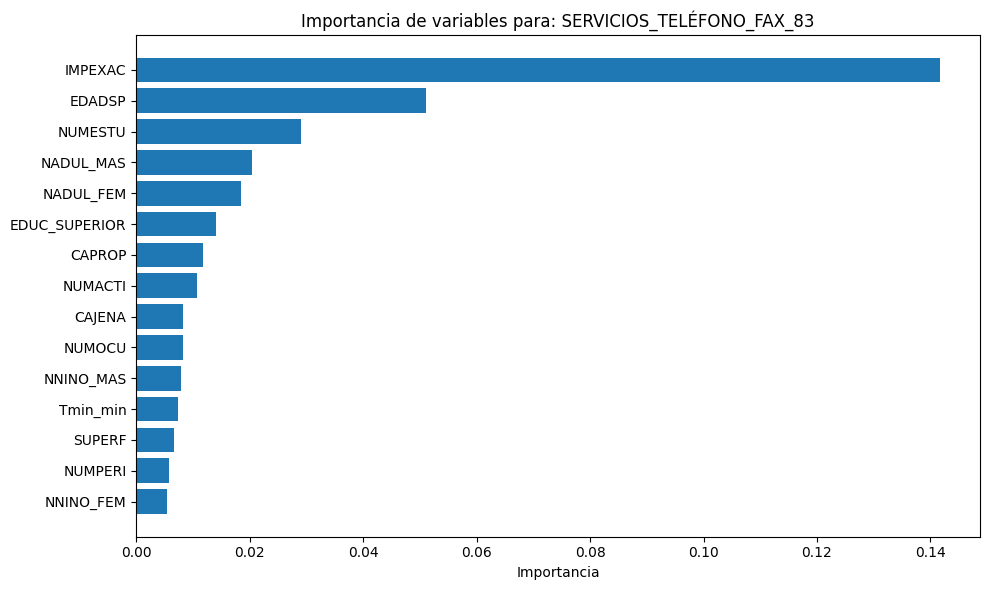

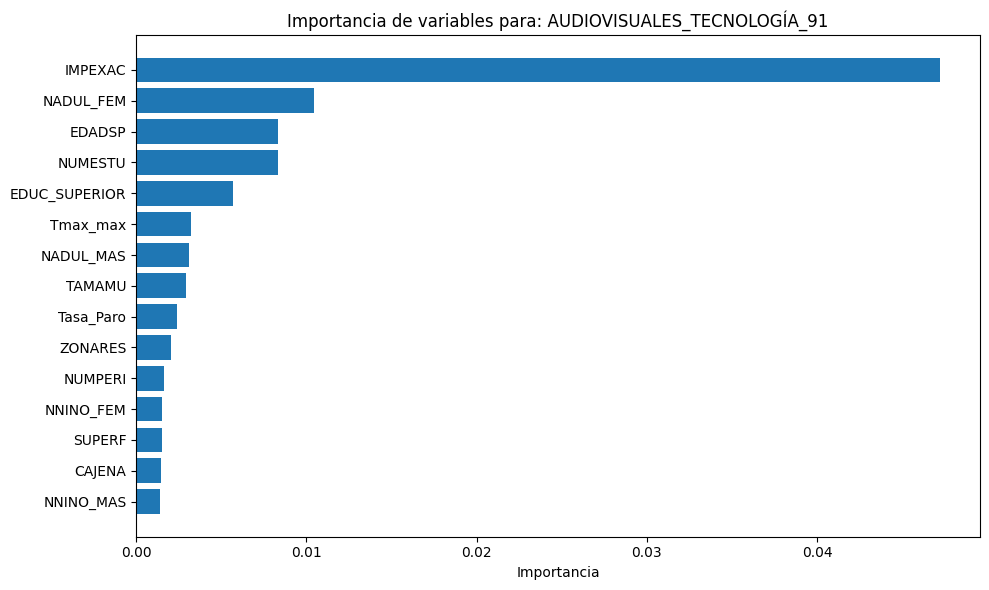

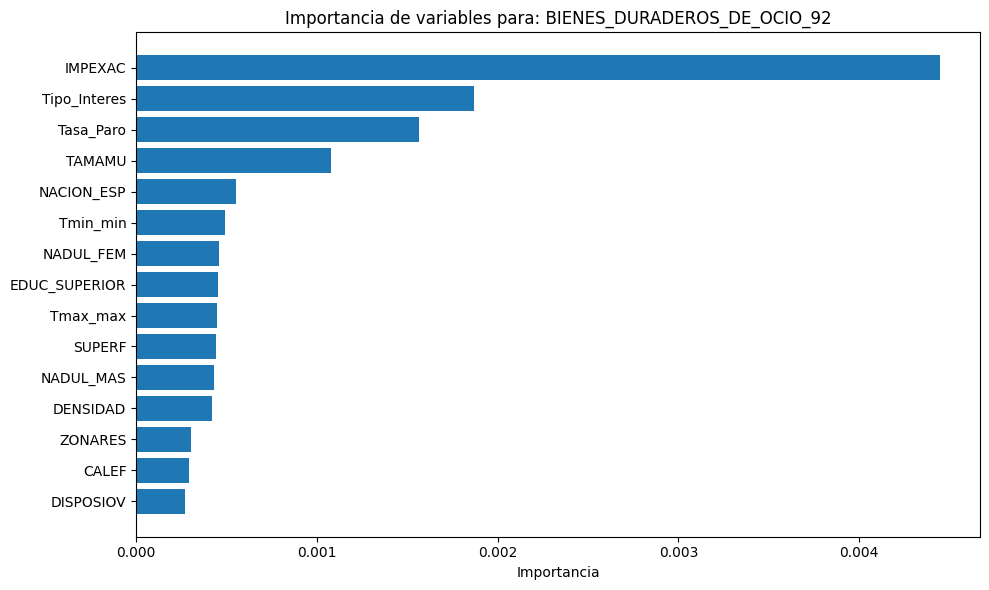

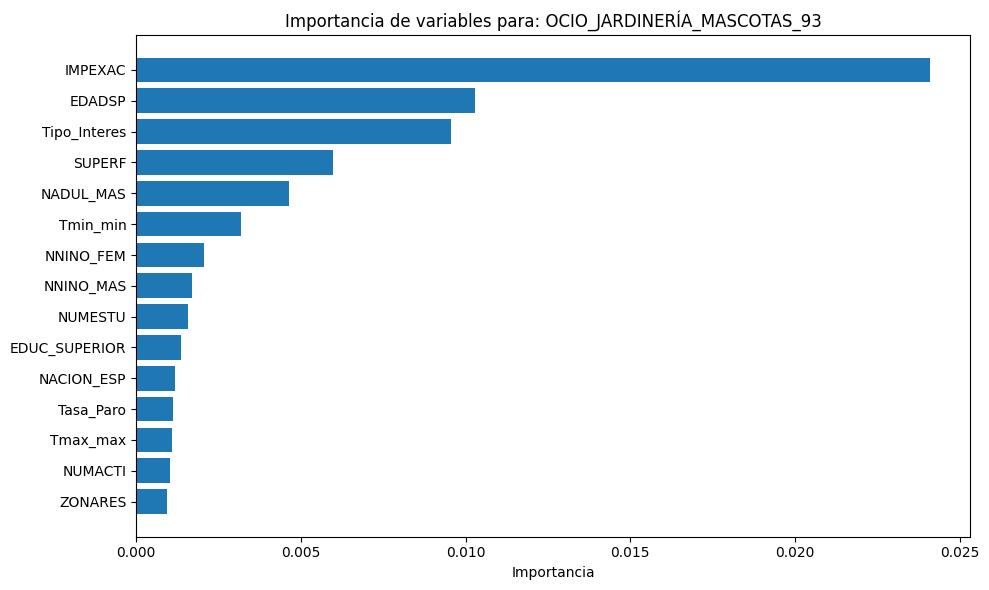

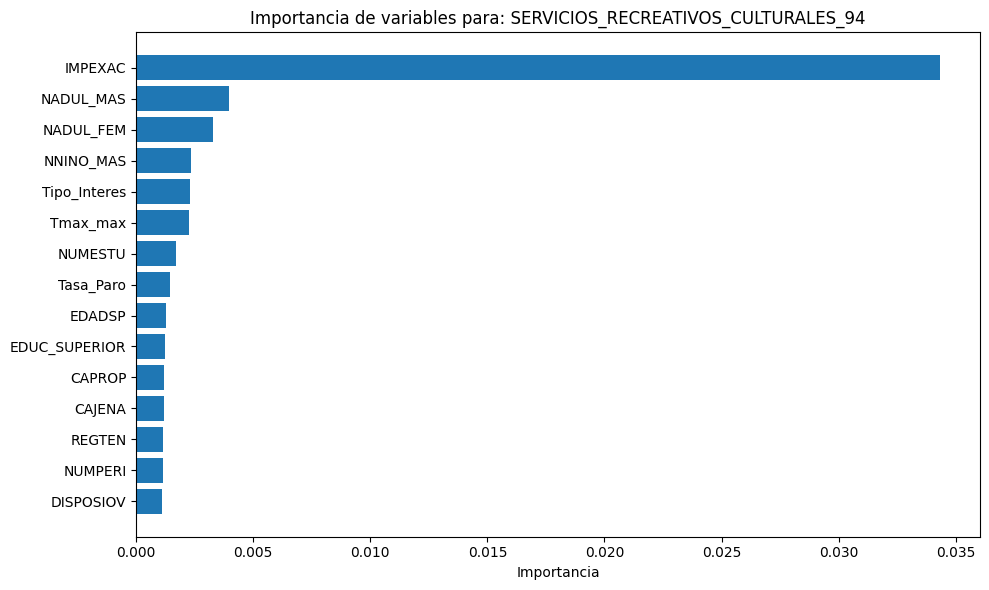

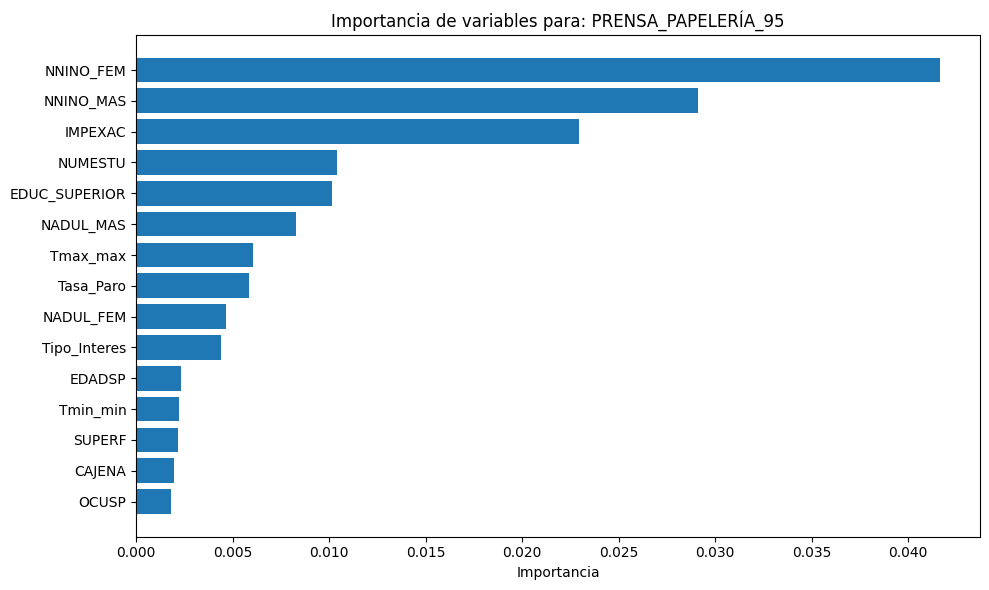

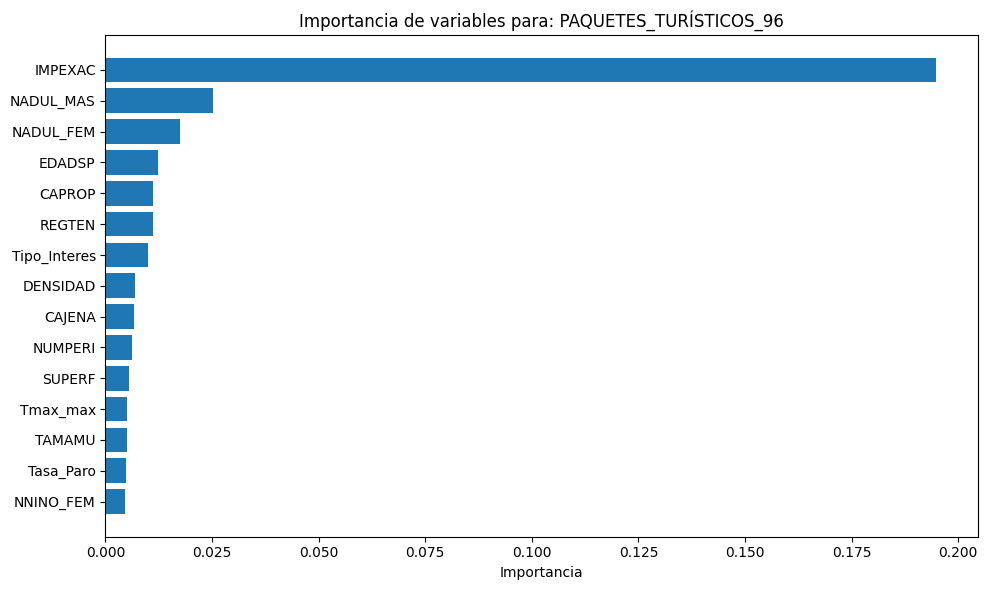

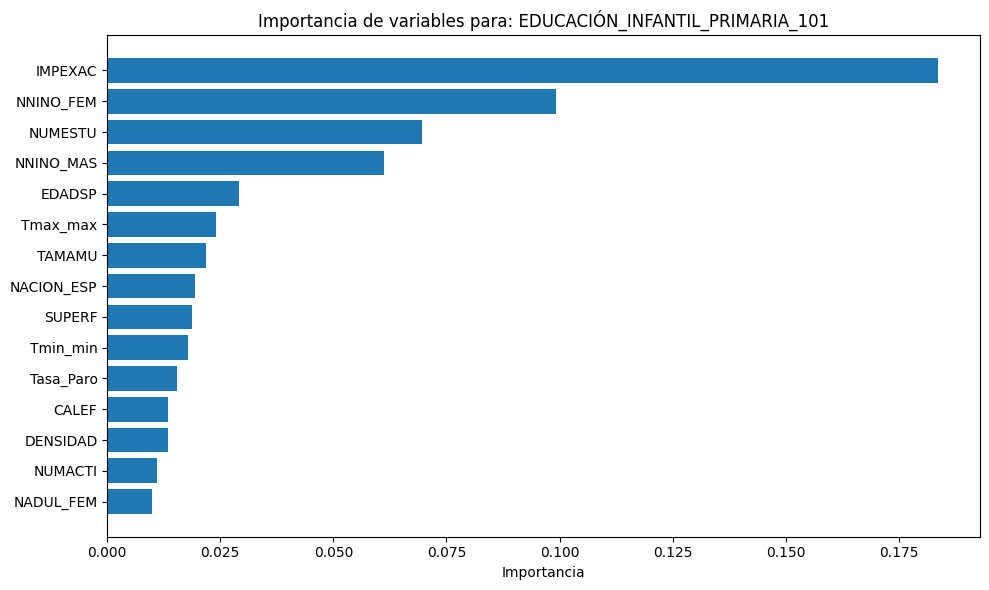

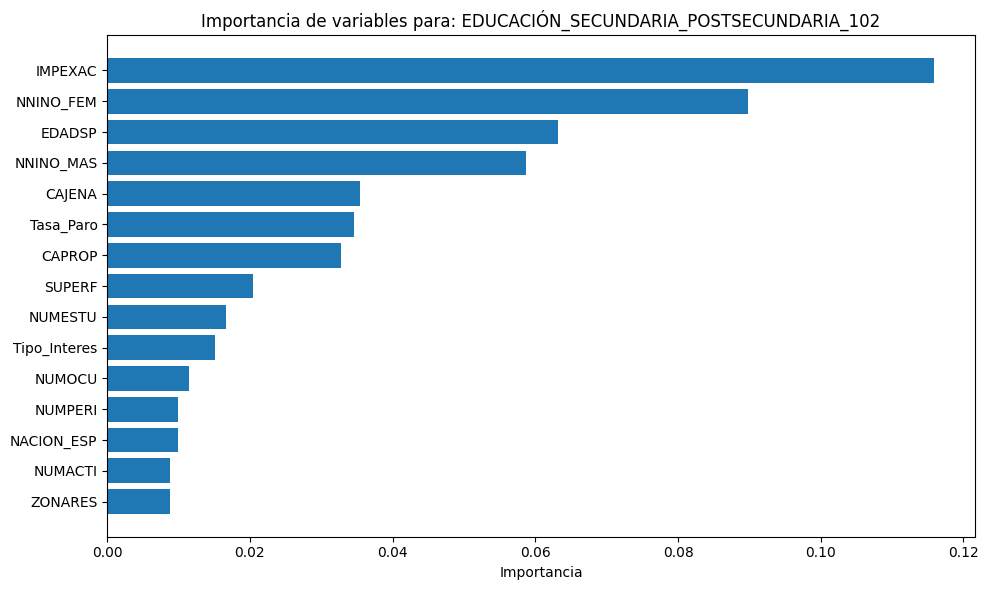

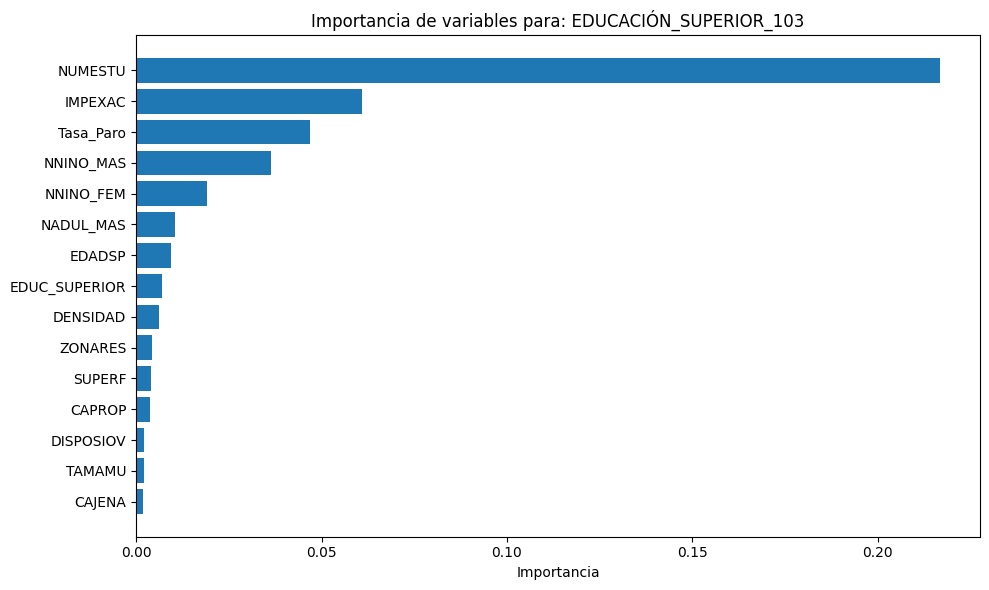

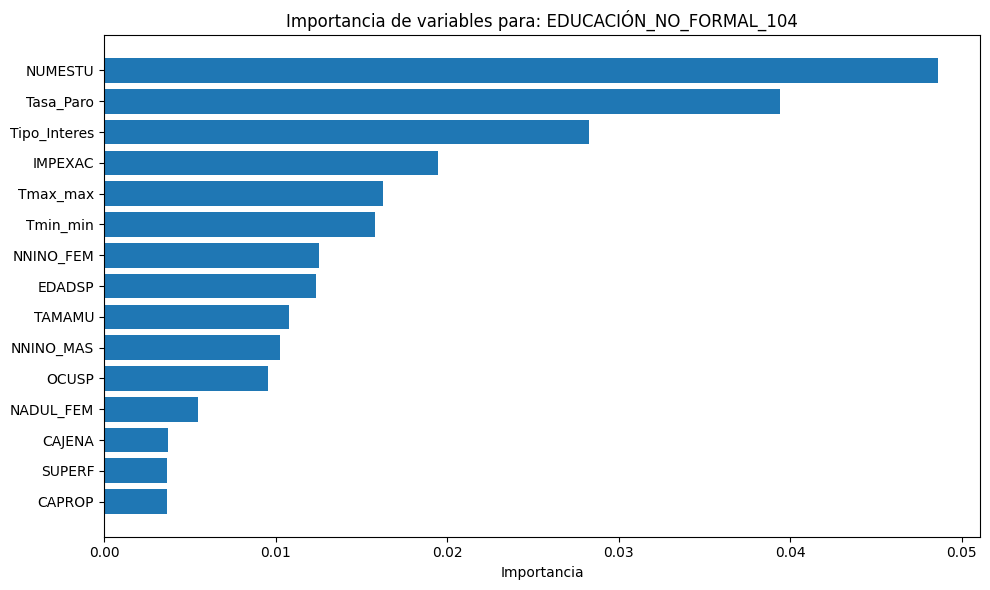

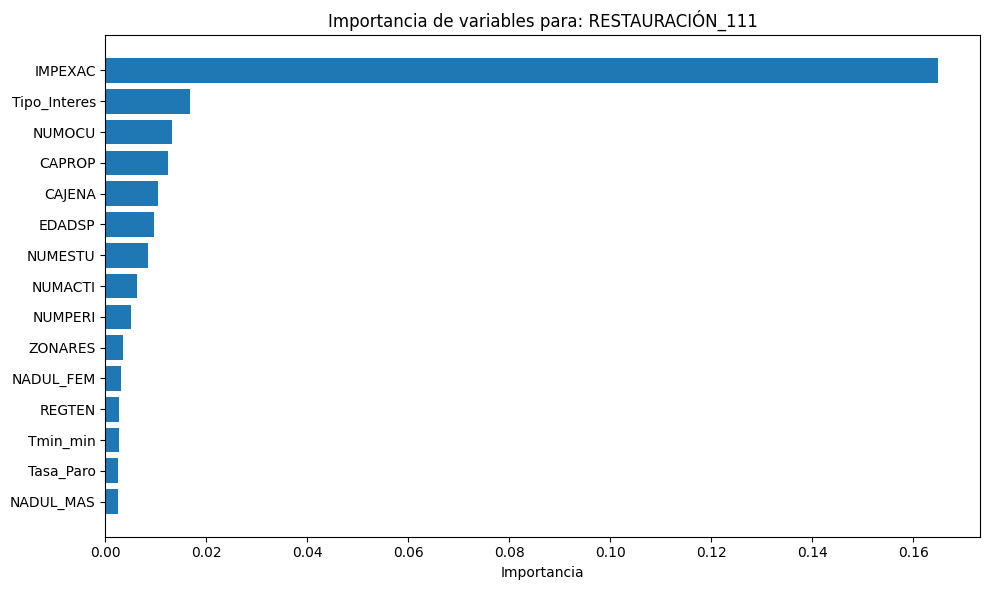

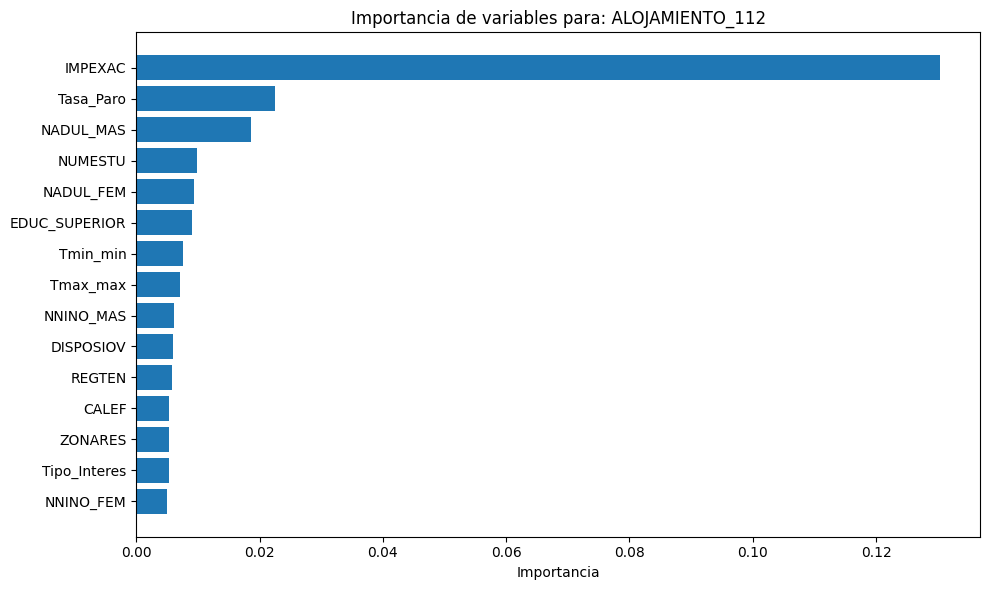

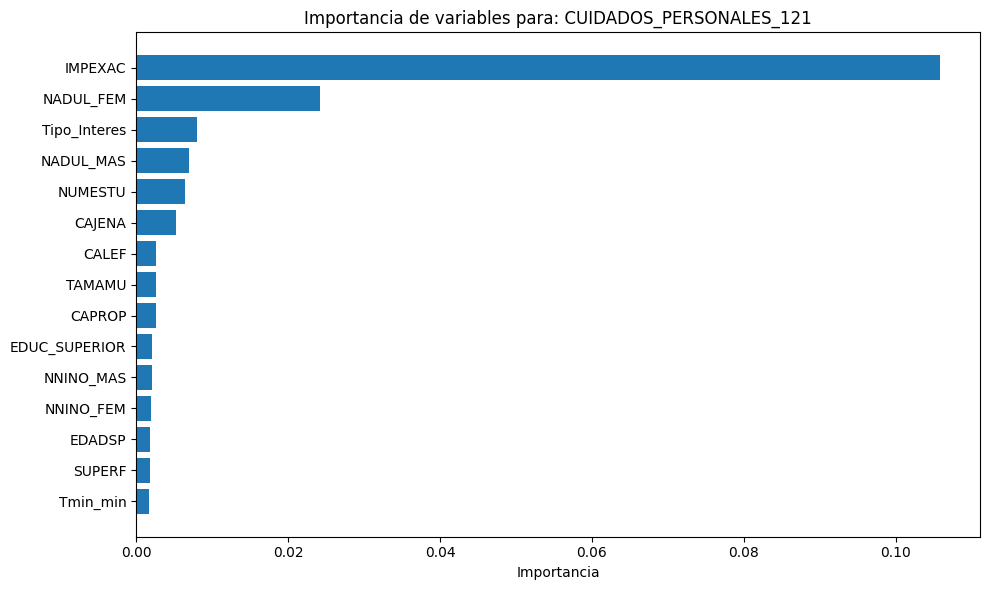

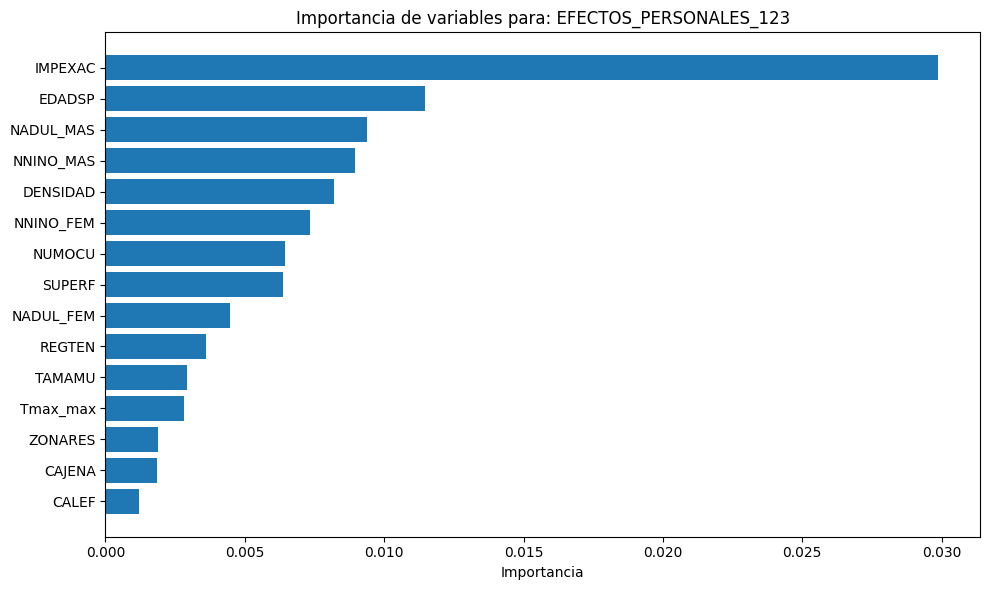

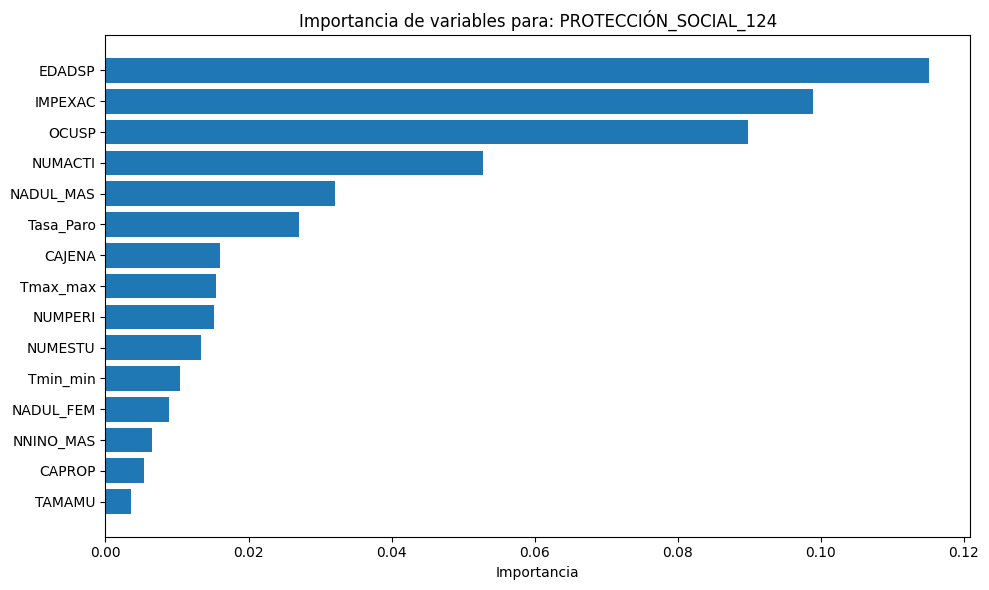

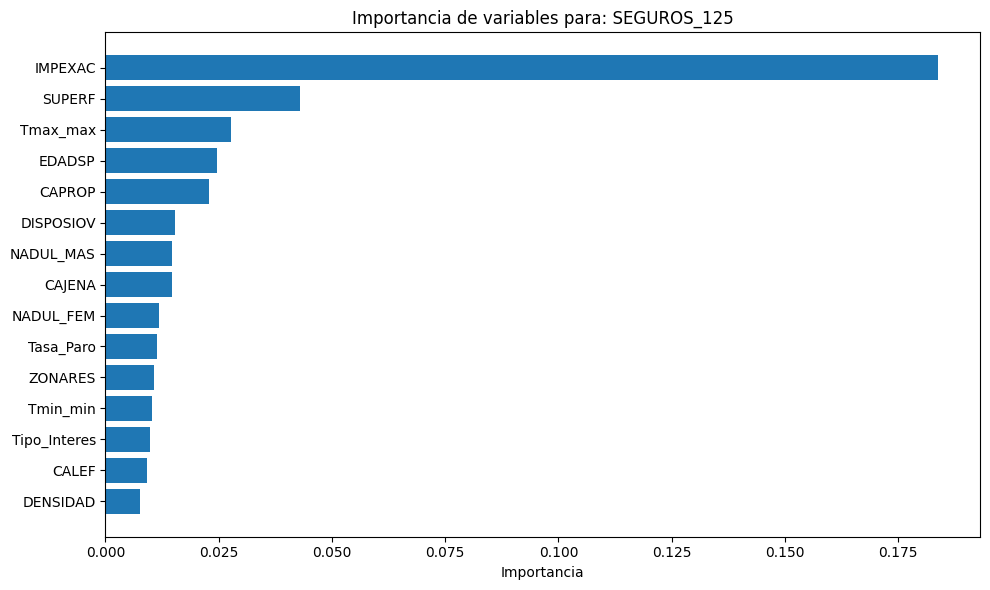

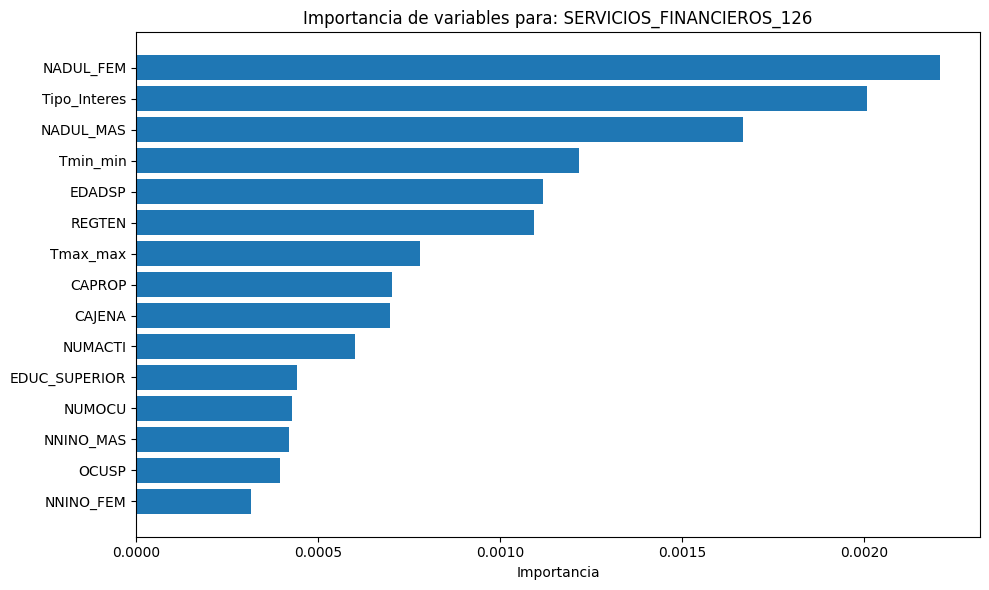

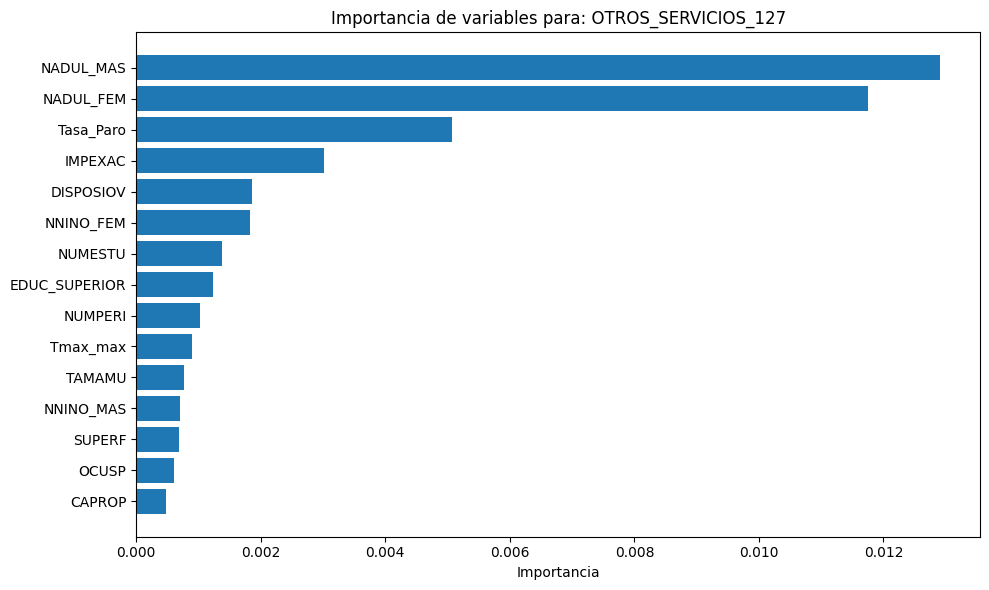

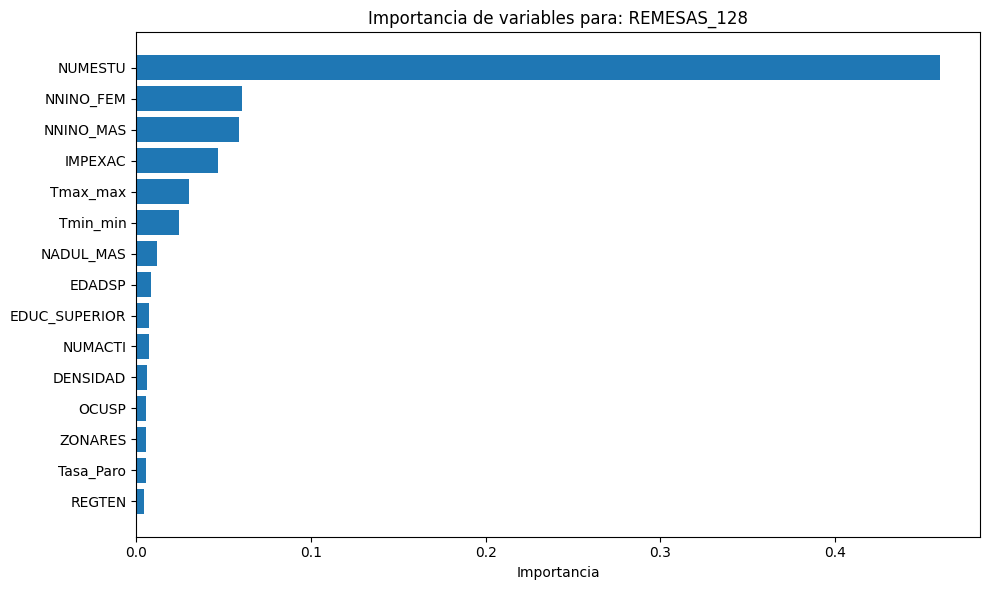

In [23]:
plot_feature_importances_by_target(mlp_importances_df)